# Датасет про футбольные матчи
Здесь рассмотрены и визуализированы данные записей футбольных матчей с чемпионата европы 2020 года, который проводился в 2021 году (из-за пандемии COVID-19) в нескольких странах Европы. Данные располагаются в архиве UEFAEuro2020.zip. Анализируются составы играющих команд и такие события как передачи и удары по воротам.

In [2]:
import pandas as pd
from zipfile import ZipFile

zip = ZipFile('/Users/elenasharova/Desktop/python-2024-hw4/UEFAEuro2020.zip', 'r')
matches = pd.read_csv(zip.open('UEFAEuro2020Matches.csv'), encoding = 'utf-8') 
lineups = pd.read_csv(zip.open('UEFAEuro2020Lineups.csv'), encoding = 'utf-8')
passes = pd.read_csv(zip.open('UEFAEuro2020Passes.csv'), encoding = 'utf-8')
shots = pd.read_csv(zip.open('UEFAEuro2020Shots.csv'), encoding = 'utf-8')

In [4]:
#тестирование для файла matches
print (matches.shape) #размерность: строки на столбцы
matches.iloc[:5,:4] #первые 5 строк и первые 4 столбца

(51, 18)


,match_id,match_date,kick_off,competition_stage_id
0,3795220,2021-07-06,21:00:00.000,15
1,3788769,2021-06-21,21:00:00.000,10
2,3788761,2021-06-18,15:00:00.000,10
3,3788766,2021-06-20,18:00:00.000,10
4,3788764,2021-06-19,18:00:00.000,10


In [6]:
#тестирование для файла lineups
print (lineups.shape)
lineups.iloc[:5,:4]

(1576, 8)


,match_id,team_id,team_name,player_id
0,3795220,914,Italy,3166
1,3795220,914,Italy,4355
2,3795220,914,Italy,6954
3,3795220,914,Italy,7002
4,3795220,914,Italy,7024


In [8]:
#тестирование для файла passes
print (passes.shape)
passes.iloc[:5,:4]

(54820, 24)


,match_id,index,id,period
0,3795220,5,5ca9ecb5-21d1-42fd-afef-aa79929facae,1
1,3795220,8,1523f029-3595-4228-9474-848a0f1052b7,1
2,3795220,12,b50fd511-f862-4c04-94ea-953558db6ad6,1
3,3795220,14,68c99a72-14e8-40df-b56d-50e41fb58f5a,1
4,3795220,15,613318e8-0614-4d34-ad20-b1a4325c46e9,1


In [10]:
#тестирование для файла shots
print (shots.shape)
shots.iloc[:5,:4]

(1289, 18)


,match_id,index,id,period
0,3795220,737,99ff6d20-8ca9-488f-a69c-f7ee8b7412a6,1
1,3795220,1172,6bc7b083-8e6e-4b59-be64-16c1152740fb,1
2,3795220,1176,02093e93-bce9-450f-83db-a17cf7a19b0a,1
3,3795220,1429,0e95b739-47a4-43b7-8016-02fd200e6355,1
4,3795220,1733,1b413a09-3dc6-44b1-8ad6-4378d3d9f9d2,1


### Функция, выдающая информации о матче

In [19]:
def matchInfo(match_id):
    filtered_matches = matches[matches['match_id'] == match_id] # фильтруем и находим строку в таблице matches, где значение match_id совпадает с введенным значением
    match = filtered_matches.iloc[0] # выводит первую и единственную строку с True, как как id не повторяется

    # вся необходимая информация по заданию: страны-игроки + счет + этап соревнований + название стадиона + страна стадиона
    information = f"{match['home_team_name']} - {match['away_team_name']} " f"({match['home_score']} - {match['away_score']}, "f"{match['competition_stage_name']}, {match['stadium_name']} " f"({match['stadium_country']}))"
    return information

# пример ввода функции:
print(matchInfo(matches['match_id'].min()))
print (matchInfo(matches['match_id'].max()))

Turkey - Italy (0 - 3, Group Stage, Estadio Olímpico (Italy))
Italy - England (1 - 1, Final, Wembley Stadium (England))


### Описательная статистика для числа голов

In [23]:
matches['total_score'] = matches['home_score'] + matches['away_score'] 
print(matches['total_score'].describe())

count    51.000000
mean      2.784314
std       1.616338
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       8.000000
Name: total_score, dtype: float64


### Нарисовать график для количества голов

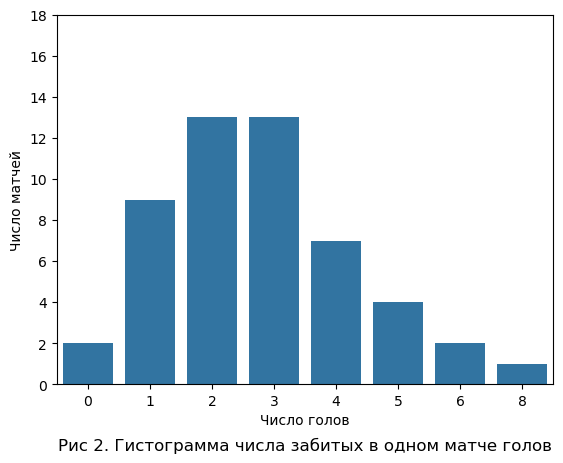

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

sns.countplot(x = matches['total_score'])
plt.xlabel('Число голов')
plt.ylabel('Число матчей')
plt.ylim(0, 18)
plt.title('Рис 2. Гистограмма числа забитых в одном матче голов', y = -0.2) # y = -0.2 чтобы подпись была под графиком 
plt.show()

### Самые результативные и самые нерезультативные матчи

In [31]:
very_poor_result = matches[matches['total_score'] == matches['total_score'].min()] 
for match_id in very_poor_result['match_id']:
    print (matchInfo(match_id)) #используя написанную ранее функцию, выводим информацию по такому матчу 

very_good_result = matches[matches['total_score'] == matches['total_score'].max()] 
for match_id in very_good_result['match_id']:
    print(matchInfo(match_id))

England - Scotland (0 - 0, Group Stage, Wembley Stadium (England))
Spain - Sweden (0 - 0, Group Stage, Estadio de La Cartuja (Spain))
Croatia - Spain (3 - 5, Round of 16, Parken (Denmark))


### Матчи, где было меньше 3 замен, таблица lineups
Основная идея: если бы не было замен, были бы только стартовые 11 игроков. 
Тогда замены: сколько всего неповторяющихся игроков за игру минус 11

In [34]:
grouped = lineups.groupby(['match_id', 'team_id']) # группируем данные по match_id и team_id
subs = grouped['player_id'].nunique().reset_index() # считаем количество неповторяющихся игроков для каждой команды в каждом матче
subs.columns = ['match_id', 'team_id', 'player_id'] 
subs['substitutions'] = subs['player_id'] - 11 # идея о количестве замен, описанная выше
less_than_three = subs[subs['substitutions'] < 3] # фильт матчей и команд с менее 3 заменами

result = less_than_three.merge(lineups[['match_id', 'team_id', 'team_name']], on=['match_id', 'team_id'], how='left').drop_duplicates()
 # объединяем с исходным датафреймом для получения названий команд, не забываем убрать повторения

for index, row in result.iterrows(): # используем цикл, который проходит по каждой строке в датафрейме
    match_info = matchInfo(row['match_id']) # вывод результата с помощью функции matchInfo
    print(f"Match {row['match_id']}: {match_info}, Team: {row['team_name']}, Subs: {row['substitutions']}")

Match 3788744: Wales - Switzerland (1 - 1, Group Stage, Bakı Olimpiya Stadionu (Azerbaijan)), Team: Switzerland, Subs: 2
Match 3788744: Wales - Switzerland (1 - 1, Group Stage, Bakı Olimpiya Stadionu (Azerbaijan)), Team: Wales, Subs: 2
Match 3788746: Netherlands - Ukraine (3 - 2, Group Stage, Johan Cruijff Arena (Amsterdam) (Netherlands)), Team: Ukraine, Subs: 2
Match 3788751: France - Germany (1 - 0, Group Stage, Allianz Arena (Germany)), Team: France, Subs: 2
Match 3788759: England - Scotland (0 - 0, Group Stage, Wembley Stadium (England)), Team: England, Subs: 2
Match 3788759: England - Scotland (0 - 0, Group Stage, Wembley Stadium (England)), Team: Scotland, Subs: 2
Match 3794688: England - Germany (2 - 0, Round of 16, Wembley Stadium (England)), Team: England, Subs: 2
Match 3795187: Ukraine - England (0 - 4, Quarter-finals, Estadio Olímpico (Italy)), Team: Ukraine, Subs: 2


### Точные передачи, разные направления
Сосчитаем долю точных передач среди всех передач (передача считается точной, если её outcome_id отсутствует), а также по группам передач по разным направлениям: вперёд, назад, поперечные. Будем считать передачу передачей вперёд, если её угол (angle) лежит между −𝜋/4 и 𝜋/4, поперечной, если угол между 𝜋/4 и 3𝜋/4 или между −3𝜋/4 и −𝜋/4, остальные — передачи назад.

In [42]:
passes['successful_passes'] = passes['outcome_id'].isna() 

passes['direction'] = np.where(passes['angle'].between(-np.pi/4, np.pi/4), 'forward', np.where(passes['angle'].between(np.pi/4, 3*np.pi/4) | passes['angle'].between(-3*np.pi/4, -np.pi/4), 'across','backward'))
  # создаем новый столбец direction, в котором мы классифицируем удары по углу

share_of_all_successful = passes['successful_passes'].mean() # всего точных передач 
share_of_successful_by_direction = passes.groupby('direction')['successful_passes'].mean() # доля точных передач по направлениям 

print(round(share_of_all_successful, 3))
print(round (share_of_successful_by_direction, 3))

#вывод, который можно сделать из найденной информации - сложнее всего точно передавать при пасе forward

0.835
direction
across      0.884
backward    0.967
forward     0.676
Name: successful_passes, dtype: float64


### 5 команд с самыми высокими и самыми низкими долями точных передач

In [45]:
 team_passes_success = passes.groupby('team_name')['successful_passes'].mean().sort_values(ascending=False) 
 #группировка по названию команды, считаем среднее по столбцу 'successful_passes'  из предыдущего пункта, сортируем в порядке убывания, чтобы было легко выводить
print(team_passes_success.head())
print(team_passes_success.tail())

team_name
Spain       0.887549
Germany     0.879026
Portugal    0.874413
France      0.874129
Italy       0.866954
Name: successful_passes, dtype: float64
team_name
Russia            0.766284
Poland            0.764579
Czech Republic    0.760072
Hungary           0.759494
Sweden            0.756250
Name: successful_passes, dtype: float64


### Гистограммы длины успешных и неудачных передач

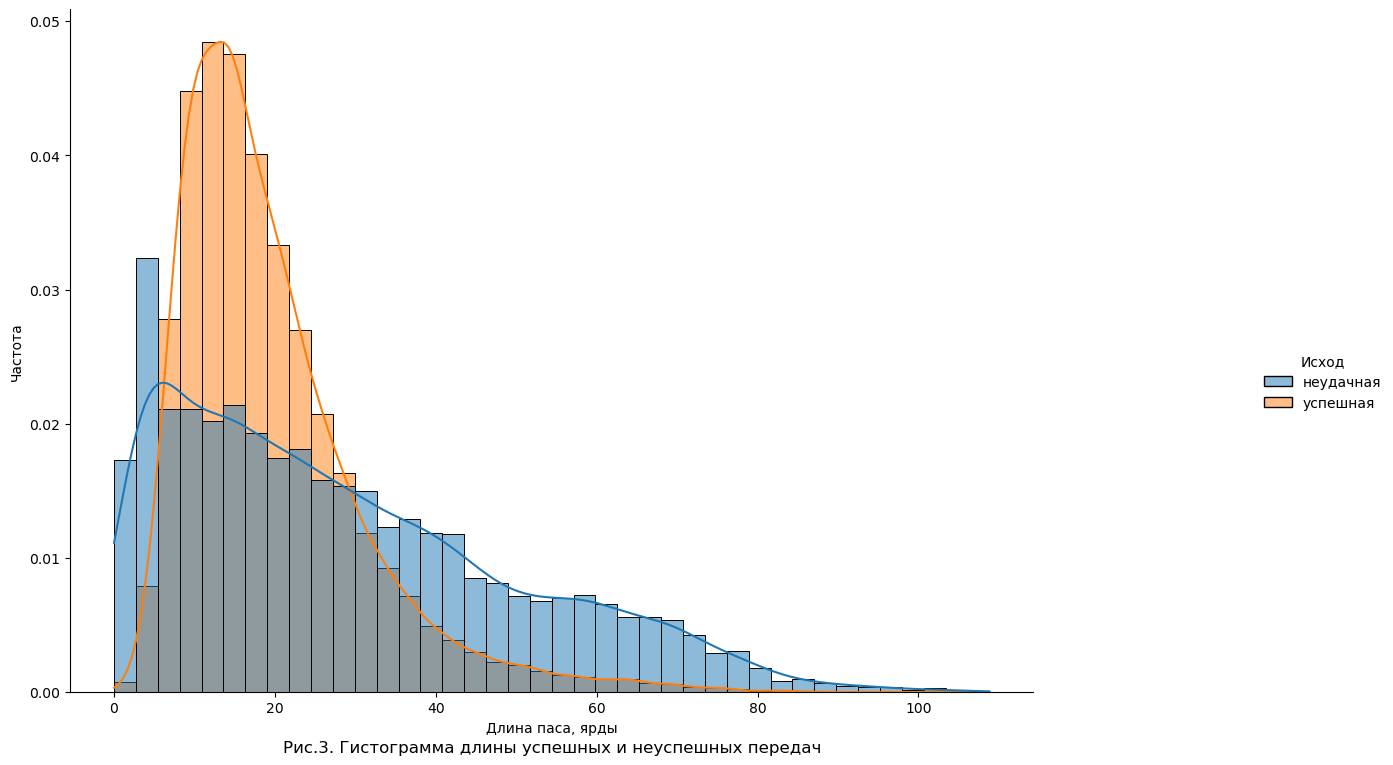

In [50]:
unsuccessful_passes = passes[~passes['successful_passes']].assign(Исход ='неудачная')  # неуспешные передачи, разделяем с помощью категории
successful_passes = passes[passes['successful_passes']].assign(Исход ='успешная')  # успешные передачи
combined_passes = pd.concat([unsuccessful_passes, successful_passes])

length_hist = sns.displot(combined_passes, x='length', hue='Исход', kind='hist', bins=40, stat='density', common_norm=False,kde=True)
# combined_passes - созданный для этого пункта датафрейм
# x='length' - по оси х идет длина передач
# hue='category - разделение данных на успешные и неуспешные
# kind='hist'- тип графика - гистограмма
# bins=40 - кол-во интервалов
# stat='density'
# common_norm=False - нормализация по оси Y проводится отдельно для каждой категории
# kde=True - добавление сглаженных линий, огибающих гистограмму


length_hist.fig.set_figwidth(15)
length_hist.fig.set_figheight(8)
plt.xlabel('Длина паса, ярды')
plt.ylabel('Частота')
plt.title('Рис.3. Гистограмма длины успешных и неуспешных передач', y= -0.1)
plt.show()

# Вывод: примерно при пасе на 15 ярдах передачи чаще всего бывают успешными; на 5 метрах чаще всего ошибаются.

### Среднее число успешных передач за матч для команд

In [53]:
successful_passes = passes[passes['successful_passes']].copy() 
grouped_passes = successful_passes.groupby(['team_name', 'match_id']) # группировка по командам и матчам
successful_passes_counts = grouped_passes.size() # счет кол-ва успешных передач в каждой группировке
successful_passes_counts = successful_passes_counts.reset_index(name='successful_passes_count') # новый индекс для удобства

avgnumpasses = successful_passes_counts.groupby('team_name')['successful_passes_count'].mean().reset_index() 
# среднее количество успешных передач для каждой команды
avgnumpasses.rename(columns={'successful_passes_count': 'Mean number of accurate passes'}, inplace=True) 
# переименовыванием колонку 

print(avgnumpasses.head())

        team_name  Mean number of accurate passes
0         Austria                      472.750000
1         Belgium                      524.000000
2         Croatia                      442.000000
3  Czech Republic                      335.800000
4         Denmark                      430.166667


### Среднее число забитых голов за матч

In [58]:
home_country_goals = matches[["home_team_name", "home_score"]] # голы для команды дома
home_country_goals.columns = ["team_name", "score"]

away_country_goals = matches[["away_team_name", "away_score"]] # голы для команды-гостя
away_country_goals.columns = ["team_name", "score"]

country_goals = pd.concat([home_country_goals, away_country_goals]) # объединяем голы команды дома и в гостях

avgnumgoals = country_goals.groupby('team_name')['score'].mean().reset_index() # подсчитываем среднее количество голов для каждой команды, ставим новый индекс
avgnumgoals.rename(columns={'score': 'Mean number of goals'}, inplace=True)  # переименовыванием колонку

print(avgnumgoals.head())

        team_name  Mean number of goals
0         Austria                  1.25
1         Belgium                  1.80
2         Croatia                  1.75
3  Czech Republic                  1.20
4         Denmark                  2.00


### Регрессионная диаграмма

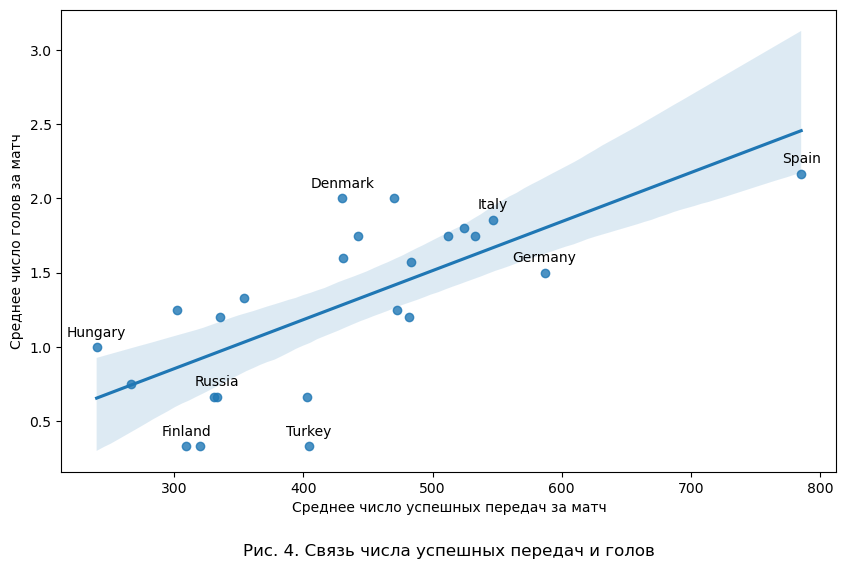

In [63]:
merged_data = pd.merge(avgnumpasses, avgnumgoals, on='team_name') 
 # объединяем два DataFrame по 'team_name', чтобы в одном датафрейме были и средние передачи, и средние голы

# строим регрессионную диаграмму
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x='Mean number of accurate passes', y='Mean number of goals') 
plt.title('Рис. 4. Связь числа успешных передач и голов', y = -0.2)
plt.xlabel('Среднее число успешных передач за матч')
plt.ylabel('Среднее число голов за матч')

teams_to_label = ['Denmark', 'Hungary', 'Italy', 'Spain', 'Germany', 'Russia', 'Finland', 'Turkey']

for i, row in merged_data.iterrows(): # проходим по строкам датафрейма merged_data; 
    if row['team_name'] in teams_to_label:
        plt.text(row['Mean number of accurate passes'], row['Mean number of goals'] + 0.05, row['team_name'], 
                 verticalalignment='bottom', horizontalalignment ='center')

plt.show()

### Две гистограммы расстояний, с которых наносятся удачные и неудачные удары
Данные устроены так, что атакующая команда всегда атакует «направо» и наносит удары в «правые» ворота (с координатой 𝑥, равной 120). Кроме того, в данных содержатся всевозможные удары по воротам, даже в послематчевых пенальти (такие удары можно определить по полю period, равному 5), их удаляем.

0    23.118
1    15.100
2    12.000
3    27.683
4    19.573
Name: distance, dtype: float64


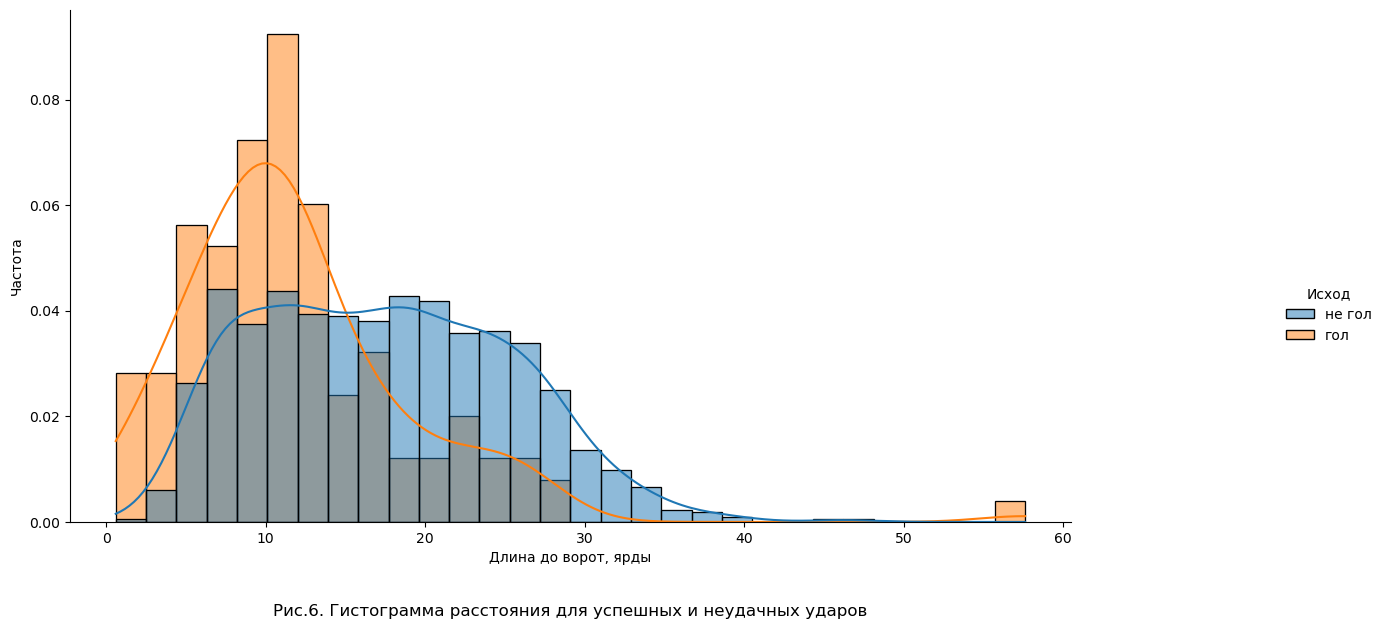

      match_id  index                                    id  period  minute  \
1129   3788748   1987  26ef739f-b65a-4993-936e-8717cf0cd7e7       2      51   

      second  location_x  location_y  team_id       team_name  player_id  \
1129      31        63.4        25.3      912  Czech Republic       7044   

        player_name  end_location_x  end_location_y  end_location_z  \
1129  Patrik Schick           120.0            38.4             1.7   

     key_pass_id  outcome_id outcome_name   distance Исход  
1129         NaN          97         Goal  57.602517   гол  


In [67]:
shots1 = shots[shots['period'] < 5].copy()  # удаляем послематчевое пенальти, создается новый датафрейм

def distance (xy):  # спец. функция для расстояния до ближайшей точки створа ворот
    if xy.iloc[1] < 36:
        return np.sqrt((120 - xy.iloc[0])**2 + (36 - xy.iloc[1])**2)
    elif (xy.iloc[1] >= 36) and (xy.iloc[1] <= 44):
        return 120 - xy.iloc[0]
    else:
        return np.sqrt((120 - xy.iloc[0])**2 + (xy.iloc[1] - 44)**2)
shots1['distance'] = shots1[['location_x', 'location_y']].apply(distance , axis=1)  
    # новый столбец расстояний из результатов применения функции
print (round (shots1['distance'].head(),3))

shots1['Исход'] = shots1['outcome_name'].map(lambda x: 'гол' if x == 'Goal' else 'не гол')  # колонка, отделяющая голы от не-голов

length_hist = sns.displot(shots1, x='distance', hue='Исход', kind= 'hist', bins=30, stat= 'density', common_norm=False, kde=True)
length_hist.fig.set_figwidth(15)
length_hist.fig.set_figheight(6)
plt.xlabel('Длина до ворот, ярды')
plt.ylabel('Частота')
plt.title('Рис.6. Гистограмма расстояния для успешных и неудачных ударов', y=-0.2)
plt.show()

# поиск "интересного" гола (фактически ищем гол с максимального расстояния)
max_goal_distance = shots1[shots1['Исход'] == 'гол']['distance'].max()
goal_with_max_distance = shots1[shots1['distance'] == max_goal_distance]
print(goal_with_max_distance)

### Матч, где было больше всего ударов по воротам

In [72]:
shots_count = shots1.groupby('match_id').size().reset_index(name='shots_count') # подсчет количества ударов в каждом матче
#группировка данных из shots1 по столбцу match_id
#size() - количество ударов

most_shots_match_id = shots_count.loc[shots_count['shots_count'].idxmax(), 'match_id'] 
    # матч с максимальным количеством ударов ищем по максимальному значению в shots_count
shots_count_value = shots_count.loc[shots_count['shots_count'].idxmax(), 'shots_count'] 
    # сохраняем это максимальное значение ударов

print(f"Match ID: {most_shots_match_id}, Shots Count: {shots_count_value}") 
print(matchInfo(most_shots_match_id))

Match ID: 3788765, Shots Count: 43
Switzerland - Turkey (3 - 1, Group Stage, Bakı Olimpiya Stadionu (Azerbaijan))


### Визуализация футбольного поля

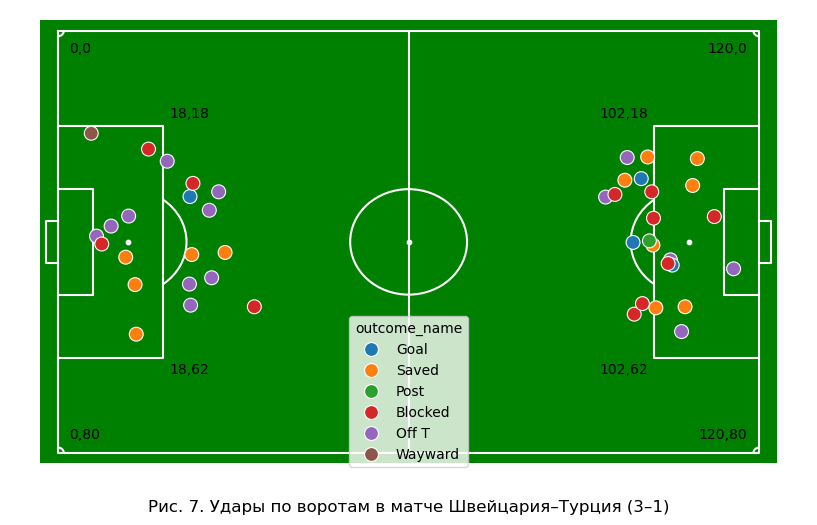

In [75]:
from pitch import plotPitch  #загружаем код, формирующий поле


found_match_table = shots1[shots1["match_id"] == most_shots_match_id].copy()  # фильтрация таблицы только с ударами из нужного матча 

# функция для преобразования координат команды гостей (Turkey)
def Turkey(row):
    if row["team_name"] == "Turkey": 
        return (120 - row["location_x"], 80 - row["location_y"]) #подсчитываем координаты
    else:
        return (row["location_x"], row["location_y"])

# формируем таблицу для нужного матча, откуда будем перекидывать всю информацию на график
found_match_table[["location_x", "location_y"]] = found_match_table.apply(Turkey, axis=1, result_type="expand")
hue_order = ['Goal', 'Saved', 'Post', 'Blocked', 'Off T', 'Wayward']

# делаем поле и всё остальное
plt.figure(figsize=(8, 5)) 
plotPitch(True)
sns.scatterplot(data=found_match_table, x="location_x", y="location_y", hue="outcome_name", s=100, hue_order=hue_order)

plt.title('Рис. 7. Удары по воротам в матче Швейцария–Турция (3–1)', y=-0.1)
plt.tight_layout(pad=0.1)
plt.show()

plt.close()